# Project: Boats Classification (9 classes)

Dataset: https://www.kaggle.com/datasets/clorichel/boat-types-recognition/data

In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras import utils

import matplotlib.pyplot as plt

print(tf.__version__)

2023-11-04 21:14:18.177280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [2]:
# load dataset
dataset = keras.utils.image_dataset_from_directory(
    directory='./data/boats',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

Found 1462 files belonging to 9 classes.


2023-11-04 21:14:19.777170: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
dataset.class_names

['buoy',
 'cruise ship',
 'ferry boat',
 'freight boat',
 'gondola',
 'inflatable boat',
 'kayak',
 'paper boat',
 'sailboat']

In [4]:
train_dataset, test_dataset = utils.split_dataset(dataset, right_size=0.2)
train_dataset, validation_dataset = utils.split_dataset(dataset, right_size=0.2)

2023-11-04 21:14:19.934704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1462]
	 [[{{node Placeholder/_0}}]]
2023-11-04 21:14:19.936077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1462]
	 [[{{node Placeholder/_0}}]]
2023-11-04 21:14:23.329490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1462]

2023-11-04 21:14:26.049526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [1170,9]
	 [[{{node Placeholder/_1}}]]


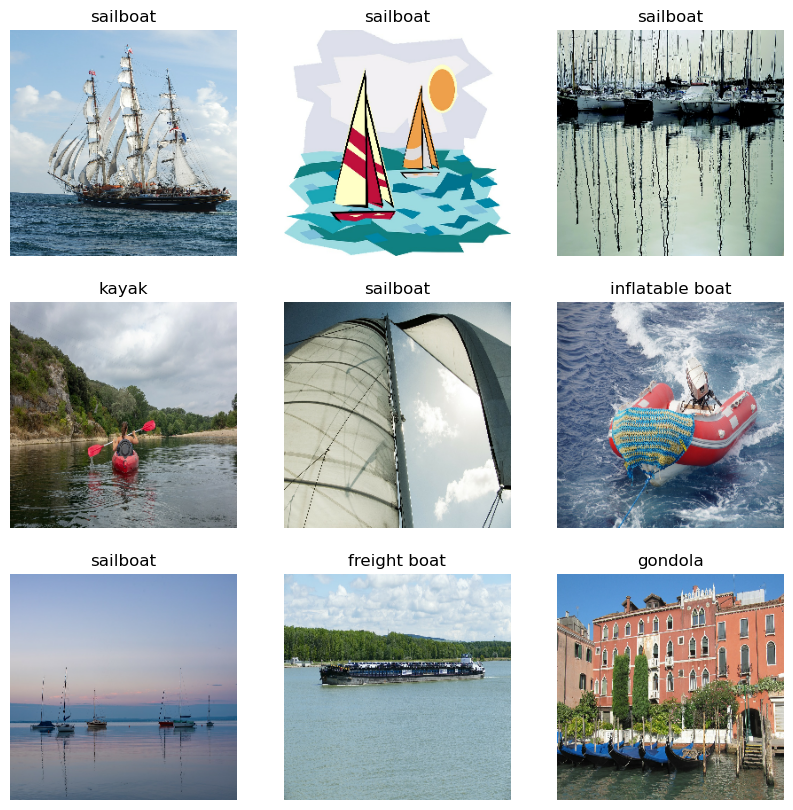

In [5]:
# sample 9 images from training dataset and show them
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(dataset.class_names[tf.argmax(labels[i])])
        plt.axis('off')

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [7]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [8]:
# backbone model
# base_model = keras.applications.MobileNetV3Small(
#     input_shape=(256, 256, 3),
#     include_top=False,
# )

# for layer in base_model.layers:
#     layer.trainable = False


# # extending model
# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(), # <-- flatten 
#     layers.Dense(len(dataset.class_names))
# ])

In [9]:
# create model
# model = models.Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
#     data_augmentation,
#     layers.Conv2D(16, 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.2),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(len(dataset.class_names))
# ])

# model = models.Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
#     data_augmentation,
#     layers.Conv2D(16, 3, padding='same', strides=(2, 2), activation='relu'),
#     layers.Conv2D(32, 3, padding='same', strides=(2, 2), activation='relu'),
#     layers.Dropout(0.2),
#     layers.Conv2D(48, 3, padding='same', strides=(2, 2), activation='relu'),
#     layers.Conv2D(64, 3, padding='same', strides=(2, 2), activation='relu'),
#     layers.Dropout(0.2),
#     layers.Conv2D(80, 3, padding='same', strides=(2, 2), activation='relu'),
#     layers.Conv2D(96, 3, padding='same', strides=(2, 2), activation='relu'),
#     layers.Dropout(0.2),
#     layers.Flatten(),
#     layers.Dense(len(dataset.class_names) * 2, activation='relu'),
#     layers.Dense(len(dataset.class_names))
# ])

model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', strides=(2, 2), activation='relu'),
    layers.Conv2D(32, 3, padding='same', strides=(2, 2), activation='relu'),
    layers.Dropout(0.2),
    layers.Conv2D(48, 3, padding='same', strides=(2, 2), activation='relu'),
    layers.Conv2D(64, 3, padding='same', strides=(2, 2), activation='relu'),
    layers.Dropout(0.2),
    layers.Conv2D(80, 3, padding='same', strides=(2, 2), activation='relu'),
    layers.Conv2D(96, 3, padding='same', strides=(2, 2), activation='relu'),
    layers.Dropout(0.2),
    layers.Conv2D(len(dataset.class_names), 4),
    layers.Flatten(),
    layers.Dense(len(dataset.class_names))
])

# compile model
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 48)        13872     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)       

In [13]:
# checkpoint save callback
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_cb = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# load weights
if os.path.exists(checkpoint_path):
    model.load_weights(checkpoint_path)

# train model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5,
    callbacks=[checkpoint_cb],
)

Epoch 1/5
37/37 [==============================] - ETA: 0s - loss: 1.8141 - accuracy: 0.3359
Epoch 1: saving model to training_2/cp.ckpt
37/37 [==============================] - 11s 305ms/step - loss: 1.8141 - accuracy: 0.3359 - val_loss: 1.8092 - val_accuracy: 0.3219
Epoch 2/5
37/37 [==============================] - ETA: 0s - loss: 1.8101 - accuracy: 0.3359
Epoch 2: saving model to training_2/cp.ckpt
37/37 [==============================] - 10s 264ms/step - loss: 1.8101 - accuracy: 0.3359 - val_loss: 1.7982 - val_accuracy: 0.3219
Epoch 3/5
37/37 [==============================] - ETA: 0s - loss: 1.8118 - accuracy: 0.3376
Epoch 3: saving model to training_2/cp.ckpt
37/37 [==============================] - 9s 254ms/step - loss: 1.8118 - accuracy: 0.3376 - val_loss: 1.7745 - val_accuracy: 0.3219
Epoch 4/5
37/37 [==============================] - ETA: 0s - loss: 1.8047 - accuracy: 0.3376
Epoch 4: saving model to training_2/cp.ckpt
37/37 [==============================] - 10s 273ms/step -

10/10 [==============================] - 1s 52ms/step - loss: 1.7229 - accuracy: 0.3562
Loss: 1.7229357957839966
Accuracy: 0.3561643958091736


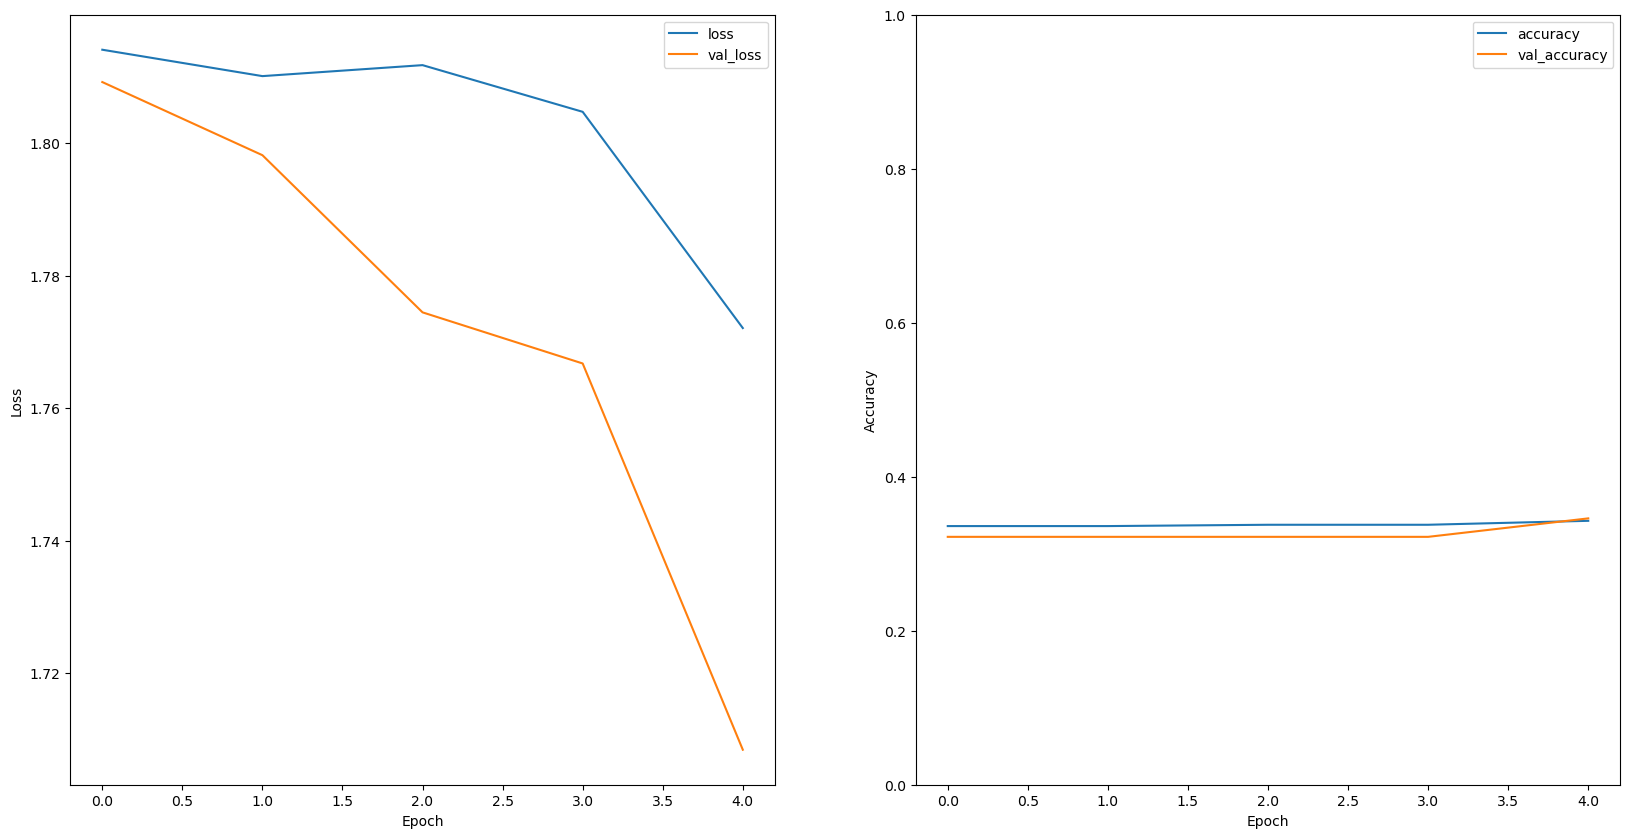

In [20]:
# plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(history.history['loss'], label='loss')
ax1.plot(history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='accuracy')
ax2.plot(history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_ylim([0, 1])
ax2.legend()

# evaluate model
loss, accuracy = model.evaluate(test_dataset)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')